In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
pd.set_option('display.max_columns', None)

C:\Users\abhir\anaconda3\envs\wildfire-data-mining\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
training_df=pd.read_csv("../Datasets/training_df_raw.csv")
training_df.fillna(0,inplace=True)
training_df.drop(['date','time'],axis=1,inplace=True)
training_df.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,10.4600,95.42882,9.7600,9.326071,0.0,0.0,0.0,0.0,0.0,1012.4,1012.03436,3.9,4.0,0.0,1.0,0.0,0.057978,7.421590,12.229406,112.833694,137.38599,11.879999,10.7600,13.110001,14.0100,21.910000,0.275,0.318,0.195,0.026,1
1,10.4535,95.42859,9.7535,9.317741,0.0,0.0,0.0,0.0,0.0,1012.4,1011.91230,3.9,4.0,0.0,1.0,0.0,0.057956,7.421590,12.229406,112.833694,137.38599,11.879999,10.7535,13.103500,14.0035,21.903500,0.275,0.318,0.195,0.026,1
2,10.4145,95.42721,9.7145,9.267784,0.0,0.0,0.0,0.0,0.0,1012.4,1011.18120,3.9,4.0,0.0,1.0,0.0,0.057823,7.421590,12.229406,112.833694,137.38599,11.879999,10.7145,13.064501,13.9645,21.864500,0.275,0.318,0.195,0.026,1
3,9.2235,99.66392,9.1735,8.143780,0.0,0.0,0.0,0.0,0.0,1012.5,1010.78680,2.7,3.0,0.0,0.0,0.0,0.003924,5.937272,11.885453,75.963730,125.13428,13.320000,10.4235,12.823500,13.7235,21.923500,0.273,0.324,0.201,0.020,1
4,9.2430,99.66399,9.1930,8.168585,0.0,0.0,0.0,0.0,0.0,1012.5,1011.15370,2.7,3.0,0.0,0.0,0.0,0.003929,5.937272,11.885453,75.963730,125.13428,13.320000,10.4430,12.842999,13.7430,21.942999,0.273,0.324,0.201,0.020,1


In [3]:
training_df.shape

(113896, 31)

In [4]:
X=training_df.drop('fire',axis=1)
y=training_df['fire']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [8]:
svm_model = SVC(kernel='rbf')

In [ ]:
svm_model.fit(X_train_transformed, y_train)

SVC()

In [ ]:
y_train_pred_svm = svm_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 77.07%


Accuracy: 76.12%
Precision: 78.71%
Recall: 76.12%
F1 Score: 75.50%


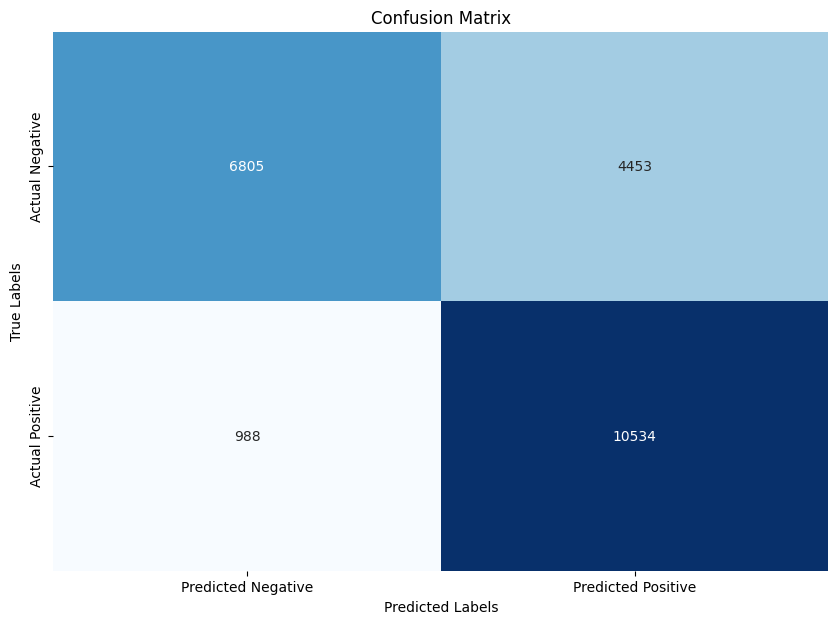

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     11258
           1       0.70      0.91      0.79     11522

    accuracy                           0.76     22780
   macro avg       0.79      0.76      0.75     22780
weighted avg       0.79      0.76      0.76     22780



In [ ]:
y_pred_svm = svm_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report)


In [10]:
svm_model = SVC()

param_dist = {
    'C': uniform(0.1, 10),  
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),  
    'kernel': ['linear', 'rbf', 'poly'],  
    'degree': randint(2, 5),  
    'tol': uniform(1e-5, 1e-3), 
    'shrinking': [True, False],
}

random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, 
                                   n_iter=5,  
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1)

random_search.fit(X_train_transformed, y_train)

print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'C': np.float64(8.290383041544555), 'degree': 2, 'gamma': np.float64(0.1), 'kernel': 'rbf', 'shrinking': True, 'tol': np.float64(0.00026102916008373167)}


In [13]:
best_svm_model = SVC(
    C=random_search.best_params_['C'],  
    gamma=random_search.best_params_['gamma'],  
    kernel=random_search.best_params_['kernel'],  
    degree=random_search.best_params_['degree'],  
    tol=random_search.best_params_['tol'], 
    shrinking=random_search.best_params_['shrinking'],
    probability=True
)

best_svm_model.fit(X_train_transformed, y_train)

y_train_pred_svm = best_svm_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 87.90%


Accuracy: 82.26%
Precision: 77.11%
Recall: 92.33%
F1 Score: 84.04%


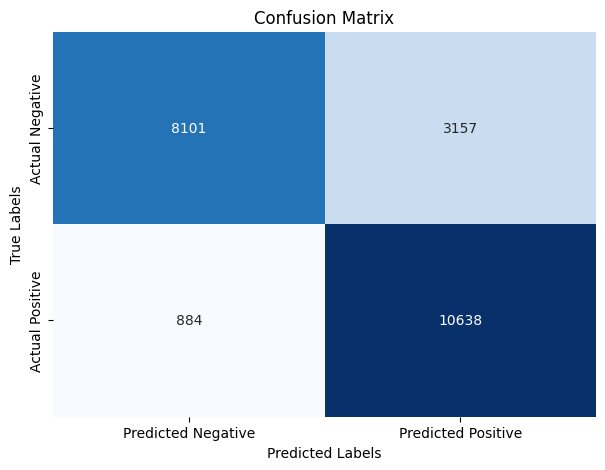

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     11258
           1       0.77      0.92      0.84     11522

    accuracy                           0.82     22780
   macro avg       0.84      0.82      0.82     22780
weighted avg       0.84      0.82      0.82     22780



In [8]:
y_pred_svm = best_svm_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report)


In [9]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_svm_model, X_test_transformed, y_test)
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
print(feature_imp_df)


                          Feature  Importance
22      soil_temperature_0_to_7cm    0.223020
15     et0_fao_evapotranspiration    0.217173
23     soil_temperature_7_to_28cm    0.198692
24   soil_temperature_28_to_100cm    0.124750
21                 wind_gusts_10m    0.101572
17                 wind_speed_10m    0.089956
18                wind_speed_100m    0.077814
25  soil_temperature_100_to_255cm    0.077384
10               surface_pressure    0.071615
26         soil_moisture_0_to_7cm    0.069728
28      soil_moisture_28_to_100cm    0.058841
3            apparent_temperature    0.053652
0                  temperature_2m    0.053257
2                    dew_point_2m    0.050000
9                    pressure_msl    0.045013
29     soil_moisture_100_to_255cm    0.044267
27        soil_moisture_7_to_28cm    0.043951
20            wind_direction_100m    0.043450
19             wind_direction_10m    0.041071
16        vapour_pressure_deficit    0.038630
1            relative_humidity_2m 

In [14]:
y_scores = best_svm_model.predict_proba(X_test_transformed)[:, 1]

AUC-ROC Score: 0.8823272549360567


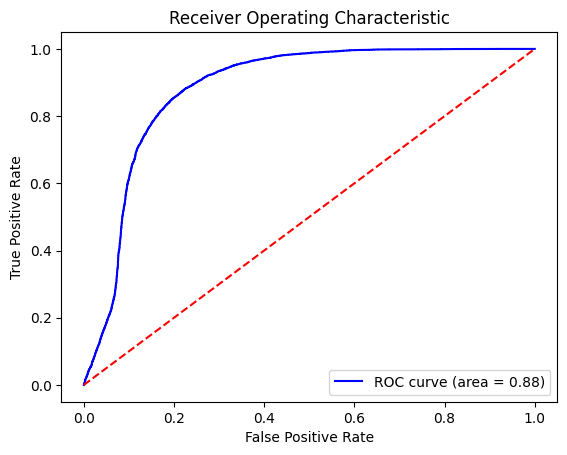

In [15]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()